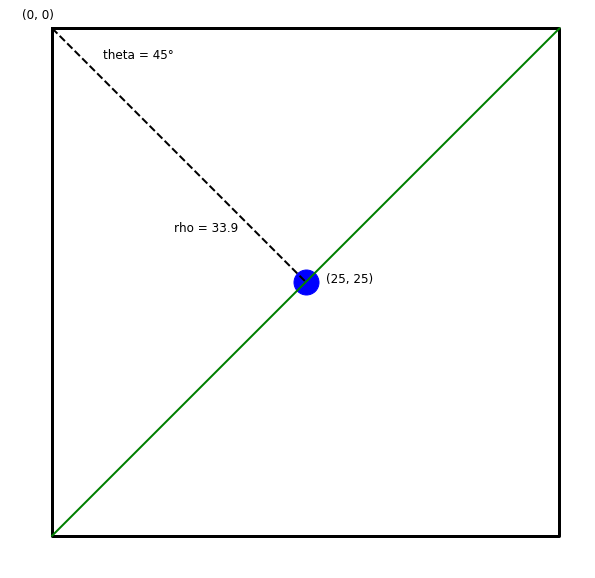

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.draw as skraw
from skimage.io import imread
from skimage.transform import hough_line
from skimage.transform import hough_line_peaks

plt.figure(figsize=(10, 10))
x = [0, 50, 50, 0, 0]
y = [0, 0, 50, 50, 0]
plt.plot(x, y, 'k', linewidth=3)
plt.plot(25, 25, 'b.', markersize=50)
plt.plot([0, 25], [0, 25], 'k--', linewidth=2)
plt.plot([50, 0], [0, 50], 'g', linewidth=2)

plt.text(12, 20, 'rho = 33.9', fontsize='large')
plt.text(5, 3, 'theta = 45°', fontsize='large')
plt.text(27, 25, '(25, 25)', fontsize='large')
plt.text(-3, -1, '(0, 0)', fontsize='large')

plt.gca().invert_yaxis()
plt.axis('equal')
plt.axis('off')
plt.show()

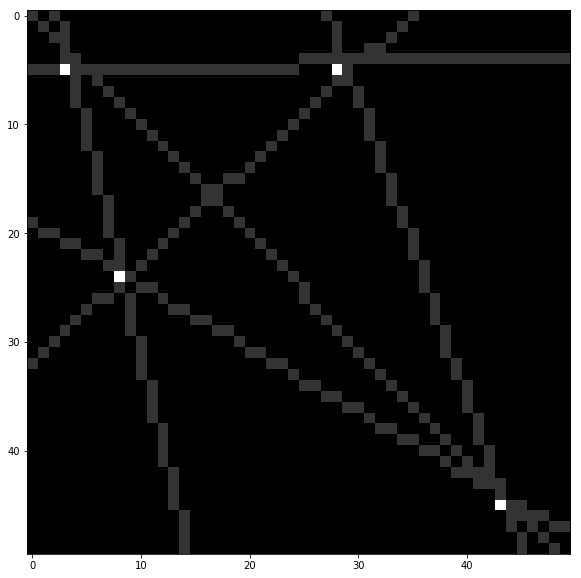

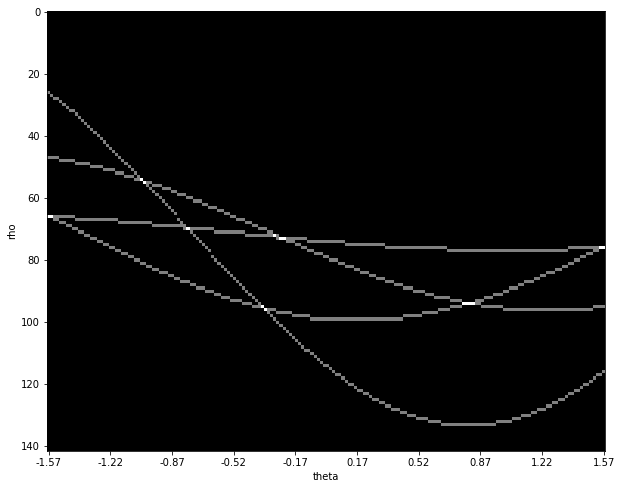

In [14]:
imh = 50
imw = 50
img = np.zeros((imh, imw))

for i in range(4):
    rrand = np.random.randint(0, imh)
    crand = np.random.randint(0, imw)
    img[rrand, crand] = 5

[H, theta, rho] = hough_line(img)
_, lthetas, lrhos = hough_line_peaks(H, theta, rho)
params = np.dstack((lthetas, lrhos)).squeeze()
for ltheta, lrho in np.atleast_2d(params) :
    x0 = np.cos(ltheta) * lrho
    y0 = np.sin(ltheta) * lrho
    lm = np.tan(ltheta + np.pi/2)
    ln = y0 - lm * x0

    xa = 0
    ya = xa * lm + ln

    xb = imw
    yb = xb * lm + ln

    rr, cc = skraw.line(int(ya), int(xa), int(yb), int(xb))
    points = np.dstack((rr, cc)).squeeze()

    rmask = np.logical_and(rr >= 0, rr < imh)
    cmask = np.logical_and(cc >= 0, cc < imw)
    mask = np.logical_and(rmask, cmask)
    points = points[mask]

    line = img[points[:,0], points[:,1]]
    img[points[:,0], points[:,1]] = np.where(line == 0, np.array([1]), line)


plt.figure(figsize=(10, 10))
plt.imshow(img, 'gray')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(H, 'gray')

ax = plt.gca()
xticks = np.linspace(0, len(theta)-1, 10)
xticklabels = ['{:.2f}'.format(s) for s in np.linspace(-np.pi/2, np.pi/2, 10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.xlabel('theta')
plt.ylabel('rho')
plt.show()